### < Topic >

1. review
    
    1.1 전처리: BPE까지
    
    1.2 N-gram 언어 모델


2. topic

    2.1 단어 표현 (BoW, DTM, TF-IDF)
    
    2.2 문서 유사도

In [2]:
# 파일 로드

movie_comments = []

with open('comment_1917.txt', 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
    for line in lines:
        movie_comments.append(line.rstrip('\n'))

In [3]:
print(movie_comments[:30])

['충무로: 이거 어케하는거냐?', '', '촬영감독의 영혼까지 갈아넣은 마스터피스', '', '오스카 작품상 탔어도 할말 없었을것 같다.', '', '주인공을 카메라가 계속 따라가는데.. 세트장이 엄청 넓은거에 놀랐습니다. 직접 1차대전에 참전하는 느낌.. 이때당시 군인들 20년뒤 히틀러라는 극악의 악마로 자식들 다 전장에 몰리고 더 최악의 고통을 받을껀데 참.....', '', '닥터스트레인지의 판단력이 좋았다.', '', '아카데미 작품상이야 작품전체를 보는거니 기생충이 받을수도 있다고 보는데 감독상은 1917 줬어도 할말 없음. 감독의 참신성이 빛을 발함. 결론적으로 아카데미 작품상과 감독상을 1917이 받았어도 아무 할말 없는 것이...', '', '솔직히 연출력만으로 최고의 영화다. 마치 우리가 투명인간이 되서 그들을 지켜보는 듯했다. 마지막장면은 영화 내내 쉴시간이 없었던것에 대한 피로감을 풀어줘서 기승전결도 완벽.', '', '스포일러가 포함된 감상평입니다. 감상평 보기', '', '진짜 원테이크 장면 너무 긴거 아님?? 촬영하기 진짜 힘들었을 듯...', '', '솔직히 나는 기생충보다 이영화가 더 재미있었다.', '', '막판에 횡으로 수많은 병사가 신호와 함께 우르르 튀어나올때 주인공 혼자 종으로 막 달리는 장면 와 진짜ㅋㅋㅋㅋ대박 무조건 아이맥스로 보세요!', '', '원테이크 촬영신은 볼때마다 대단하다 후보에 오를만 했음', '', '스포일러가 포함된 감상평입니다. 감상평 보기', '']


In [11]:
# cleaning: 특수문자 제거

import re

r = '[-=+,#/\?:^$.@*\"~&%.!\'|\(\)\[\]\<\>`\']'

movie_new_comments = []
for comment in movie_comments:
    movie_new_comments.append(re.sub(r, '', comment))

print(movie_new_comments[:30])

['충무로 이거 어케하는거냐', '', '촬영감독의 영혼까지 갈아넣은 마스터피스', '', '오스카 작품상 탔어도 할말 없었을것 같다', '', '주인공을 카메라가 계속 따라가는데 세트장이 엄청 넓은거에 놀랐습니다 직접 1차대전에 참전하는 느낌 이때당시 군인들 20년뒤 히틀러라는 극악의 악마로 자식들 다 전장에 몰리고 더 최악의 고통을 받을껀데 참', '', '닥터스트레인지의 판단력이 좋았다', '', '아카데미 작품상이야 작품전체를 보는거니 기생충이 받을수도 있다고 보는데 감독상은 1917 줬어도 할말 없음 감독의 참신성이 빛을 발함 결론적으로 아카데미 작품상과 감독상을 1917이 받았어도 아무 할말 없는 것이', '', '솔직히 연출력만으로 최고의 영화다 마치 우리가 투명인간이 되서 그들을 지켜보는 듯했다 마지막장면은 영화 내내 쉴시간이 없었던것에 대한 피로감을 풀어줘서 기승전결도 완벽', '', '스포일러가 포함된 감상평입니다 감상평 보기', '', '진짜 원테이크 장면 너무 긴거 아님 촬영하기 진짜 힘들었을 듯', '', '솔직히 나는 기생충보다 이영화가 더 재미있었다', '', '막판에 횡으로 수많은 병사가 신호와 함께 우르르 튀어나올때 주인공 혼자 종으로 막 달리는 장면 와 진짜ㅋㅋㅋㅋ대박 무조건 아이맥스로 보세요', '', '원테이크 촬영신은 볼때마다 대단하다 후보에 오를만 했음', '', '스포일러가 포함된 감상평입니다 감상평 보기', '']


In [13]:
# 불용어 처리

stop_words = []

with open('stopwords.txt', 'r', encoding = 'utf-8') as f:
    lines = f.readlines()
    for line in lines:
        stop_words.append(line.rstrip('\n'))

In [8]:
# Tokenize

from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

okt = Okt()

In [15]:
results = []

for comment in movie_new_comments:
    for word in okt.morphs(comment):
        if word not in stop_words:
            results.append(word)

print(results[:100])

['충무로', '거', '어케', '하는거냐', '촬영감독', '영혼', '갈아', '넣은', '마스터피스', '오스카', '작품', '상', '탔어도', '할말', '없었을것', '주인공', '카메라', '계속', '따라가는데', '세트', '장이', '엄청', '넓은거에', '놀랐습니다', '직접', '1', '차', '대전', '참전', '하는', '느낌', '당시', '군', '인들', '20년', '뒤', '히틀러', '라는', '극악', '악마', '자식', '다', '전장', '몰리', '고', '더', '최악', '고통', '받을껀데', '닥터스', '트레인', '지', '판단력', '좋았다', '아카데미', '작품', '상', '이야', '작품', '전체', '보는거니', '기생충', '받을수도', '있다고', '보는데', '감독', '상', '은', '1917', '줬어도', '할말', '없음', '감독', '참신', '성', '빛', '발함', '결론', '적', '아카데미', '작품', '상과', '감독', '상', '1917', '받았어도', '아무', '할말', '없는', '솔직히', '연출', '력', '만으로', '최고', '영화', '다', '투명인간', '되서', '지켜보는', '듯']


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(results)

## 단어 분리 (Byte Pair Encoding)

### - 단어 집합 생성

In [17]:
word_counts = tokenizer.word_counts.items()

In [19]:
# 특수기호 '/w'를 넣은 뒤, 한 글자 단위로 모두 띄어 초기화

vocab = {}

for key, item in word_counts:
    key = ' '.join(key)
    key += ' </w>'      # 단어 맨 끝에 붙이는 특수 문자
    vocab[key] = item

    word_counts -> [ ( '홍길동', 5 ), ( '김길동', 3 ) ... ]
    'l o w </w>' : 5 -> 파이썬의 dictionary 이용해서 BPE 수행

In [20]:
print(vocab)

{'충 무 로 </w>': 1, '거 </w>': 1, '어 케 </w>': 1, '하 는 거 냐 </w>': 1, '촬 영 감 독 </w>': 1, '영 혼 </w>': 1, '갈 아 </w>': 1, '넣 은 </w>': 1, '마 스 터 피 스 </w>': 1, '오 스 카 </w>': 1, '작 품 </w>': 4, '상 </w>': 4, '탔 어 도 </w>': 1, '할 말 </w>': 3, '없 었 을 것 </w>': 1, '주 인 공 </w>': 2, '카 메 라 </w>': 1, '계 속 </w>': 1, '따 라 가 는 데 </w>': 1, '세 트 </w>': 1, '장 이 </w>': 1, '엄 청 </w>': 1, '넓 은 거 에 </w>': 1, '놀 랐 습 니 다 </w>': 1, '직 접 </w>': 1, '1 </w>': 1, '차 </w>': 1, '대 전 </w>': 1, '참 전 </w>': 1, '하 는 </w>': 1, '느 낌 </w>': 1, '당 시 </w>': 1, '군 </w>': 1, '인 들 </w>': 1, '2 0 년 </w>': 1, '뒤 </w>': 1, '히 틀 러 </w>': 1, '라 는 </w>': 1, '극 악 </w>': 1, '악 마 </w>': 1, '자 식 </w>': 1, '다 </w>': 2, '전 장 </w>': 1, '몰 리 </w>': 1, '고 </w>': 1, '더 </w>': 2, '최 악 </w>': 1, '고 통 </w>': 1, '받 을 껀 데 </w>': 1, '닥 터 스 </w>': 1, '트 레 인 </w>': 1, '지 </w>': 1, '판 단 력 </w>': 1, '좋 았 다 </w>': 1, '아 카 데 미 </w>': 2, '이 야 </w>': 1, '전 체 </w>': 1, '보 는 거 니 </w>': 1, '기 생 충 </w>': 2, '받 을 수 도 </w>': 1, '있 다 고 </w>': 1, '보 는 데 </w>': 1, '감 독 </w>':

### - BPE(단어 분리) 수행

In [21]:
import collections

# 글자별 빈도수 계산

def get_stats(vocab):
    pairs = collections.defaultdict(int)   # key 없이 사용할 수 있는 defaultdictict
    for word, freq in vocab.items():    # dictionary: key: 단어수 - value: 빈도수
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    return pairs

# 글자 빈도수에 따른 유니그램 작성 (빈도수가 높은 순대로 합침)

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

In [24]:
# BPE 수행 함수

num_merges = 20

for i in range(num_merges):
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
    print(best)

('평', '</w>')
('로', '</w>')
('촬', '영')
('스', '</w>')
('어', '도</w>')
('할', '말')
('할말', '</w>')
('데', '</w>')
('니', '다</w>')
('러', '</w>')
('고', '</w>')
('함', '</w>')
('영', '화')
('영화', '</w>')
('장', '면')
('장면', '</w>')
('기', '</w>')
('진', '짜')
('진짜', '</w>')
('ㅋ', 'ㅋ')


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## [ Text Preprocessing ]

    1. Tokenization
    2. Cleaning
    3. Normalization
    
    4. Lemmatization (표제어 추출)
    5. Stemming (어간 추출)
    
    6. Stopword 처리

    7. 단어 표현 (국소 단어 표현)
        7.0 Integer encoding
        7.1 One-hot encoding
        7.2 BPE
        
    8. 데이터 분리

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# 언어 모델(Language Model) 
### : 통계를 이용한 LM, 인공신경망을 이용한 LM

## - N-gram 언어 모델 (확률적 언어 모델)

In [48]:
from nltk.util import ngrams
from nltk import ConditionalFreqDist
from nltk.probability import ConditionalProbDist, MLEProbDist

In [31]:
sentences = []

for tokens in movie_new_comments:
    bigram = ngrams(tokens, 2, pad_left = True, pad_right = True, 
                   left_pad_symbol = 'SS', right_pad_symbol = 'SE')
    sentences += [t for t in bigram]

sentences[:20]

[('SS', '충'),
 ('충', '무'),
 ('무', '로'),
 ('로', ' '),
 (' ', '이'),
 ('이', '거'),
 ('거', ' '),
 (' ', '어'),
 ('어', '케'),
 ('케', '하'),
 ('하', '는'),
 ('는', '거'),
 ('거', '냐'),
 ('냐', 'SE'),
 ('SS', 'SE'),
 ('SS', '촬'),
 ('촬', '영'),
 ('영', '감'),
 ('감', '독'),
 ('독', '의')]

In [36]:
# ConditionalFreqDist 클래스를 이용한 단어 빈도수 계산

cdf = ConditionalFreqDist(sentences)

In [37]:
cdf["SS"].most_common(10)

[('SE', 13),
 ('솔', 2),
 ('스', 2),
 ('충', 1),
 ('촬', 1),
 ('오', 1),
 ('주', 1),
 ('닥', 1),
 ('아', 1),
 ('진', 1)]

In [35]:
cdf["영"].most_common(5)

[('화', 3), ('감', 1), ('혼', 1), ('하', 1), ('신', 1)]

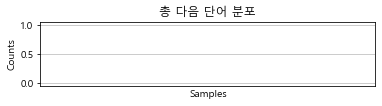

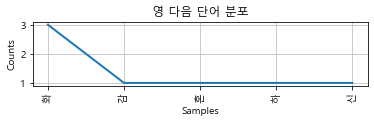

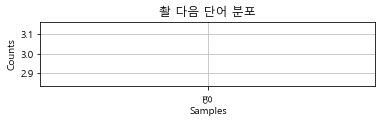

In [69]:
# 시각화

%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family= font_name)

plt.subplot(311)
cdf["총"].plot(5, title = '총 다음 단어 분포')
plt.subplot(312)
cdf["영"].plot(5, title = '영 다음 단어 분포')
plt.subplot(313)
cdf["촬"].plot(5, title = '촬 다음 단어 분포')

In [49]:
# ConditionalProbDist: 조건부 확률값이나 샘플 확률에 대한 로그 확률

cpd = ConditionalProbDist(cdf, MLEProbDist)

In [51]:
cdf["충"].most_common(5)

[('무', 1), ('이', 1), ('보', 1)]

In [56]:
cpd["충"].prob("무")

0.3333333333333333

In [55]:
cdf["영"].most_common(5)

[('화', 3), ('감', 1), ('혼', 1), ('하', 1), ('신', 1)]

In [53]:
cpd["영"].prob("화")

0.42857142857142855

In [54]:
cpd["영"].prob("혼")

0.14285714285714285

### - 무작위 문장 생성

In [57]:
# 품사 태깅하는 tokenize 함수 생성

def tokenize(doc):
    tokens = ['/'.join(t) for t in okt.pos(doc)]
    return tokens

tokenize(movie_new_comments[0])

['충무로/Noun', '이/Determiner', '거/Noun', '어케/Noun', '하는거냐/Verb']

In [60]:
# bigram 생성

from tqdm import tqdm  # progress bar

sentences = []
for d in tqdm(movie_new_comments):
    tokens = tokenize(d)
    bigram = ngrams(tokens, 2, pad_left = True, pad_right = True,
                  left_pad_symbol = 'SS', right_pad_symbol = 'SE')
    sentences += [t for t in bigram]
    
sentences[:30]

100%|█████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 210.24it/s]


[('SS', '충무로/Noun'),
 ('충무로/Noun', '이/Determiner'),
 ('이/Determiner', '거/Noun'),
 ('거/Noun', '어케/Noun'),
 ('어케/Noun', '하는거냐/Verb'),
 ('하는거냐/Verb', 'SE'),
 ('SS', 'SE'),
 ('SS', '촬영감독/Noun'),
 ('촬영감독/Noun', '의/Josa'),
 ('의/Josa', '영혼/Noun'),
 ('영혼/Noun', '까지/Josa'),
 ('까지/Josa', '갈아/Adverb'),
 ('갈아/Adverb', '넣은/Verb'),
 ('넣은/Verb', '마스터피스/Noun'),
 ('마스터피스/Noun', 'SE'),
 ('SS', 'SE'),
 ('SS', '오스카/Noun'),
 ('오스카/Noun', '작품/Noun'),
 ('작품/Noun', '상/Suffix'),
 ('상/Suffix', '탔어도/Verb'),
 ('탔어도/Verb', '할말/Verb'),
 ('할말/Verb', '없었을것/Adjective'),
 ('없었을것/Adjective', '같다/Adjective'),
 ('같다/Adjective', 'SE'),
 ('SS', 'SE'),
 ('SS', '주인공/Noun'),
 ('주인공/Noun', '을/Josa'),
 ('을/Josa', '카메라/Noun'),
 ('카메라/Noun', '가/Josa'),
 ('가/Josa', '계속/Noun')]

In [63]:
# 단어별 빈도 계산 / 조건부 확률 계산

cfd = ConditionalFreqDist(sentences)
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [64]:
# 단어별 빈도 계산 함수 생성

def korean_most_common(c, n, pos=None):
    if pos is None:
        return cfd[tokenize(c)[0]].most_common(n)
    else:
        return cfd["/".join([c, pos])].most_common(n)

korean_most_common("나", 10)

[('는/Josa', 1)]

In [68]:
# 조건부 확률 계산 함수 생성

def korean_bigram_prob(c, w):
    context = tokenize(c)[0]
    word = tokenize(w)[0]
    return cpd[context].prob(word)

korean_bigram_prob('주인공', '을')

0.5

In [70]:
# 무작위 문장 생성 함수

def generate_korean_sentence(seed = None, debug = False):
    if seed is not None:
        import random
        random.seed(seed)
    c = 'SS'
    sentence = []
    while True:
        if c not in cpd:  # 문장 시작이 없으면 break
            break
            
        w = cpd[c].generate()    # cpd[c]는 다음 단어 의미 (해당하는 확률값에 대한 단어)
        
        if w == 'SE':  # 문장이 끝이면 break
            break
        w2 = w.split('/')[0]
        pos = w.split('/')[1]
        
        if c == 'SS':
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w2 in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        elif pos in ['Josa', 'Puncuation', 'Suffix']:
            sentence.append(w2)
        elif w in ["임/Noun", "것/Noun", "는걸/Noun", "릴때/Noun",
                   "되다/Verb", "이다/Verb", "하다/Verb", "이다/Adjective"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2) 
            
        c = w
        
        if debug:
            print(w)
            
    return "".join(sentence)

In [71]:
generate_korean_sentence(0)

'스포일러가 포함 된 감상 평 보기'

In [73]:
generate_korean_sentence(2)

'막판에 참전 하는 느낌 이 때 당시 군인들 20년 뒤 히틀러라는 극악의 영화 내내 쉴 시간이 좋았다'

# 단어 표현 방법
### : 국소 표현 방식

## - BoW (Bag of Words)

In [126]:
# 이전 코드 복습
# 문장 입력

token = re.sub("(\.)", "", "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")

In [75]:
# 토큰화

token = okt.morphs(token)
print(token)

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']


In [76]:
word2index = {} # 단어별 인덱스 저장
bow = []       # 등장 횟수 vector

for voca in token:
    if voca not in word2index.keys():  
        word2index[voca] = len(word2index)  # word2index에 없는 단어는 새로 추가
        bow.insert(len(word2index)-1, 1)   # bow 전체에 기본값 저장, 단어 등장횟수는 최소 1 이상
    else:
        index = word2index.get(voca)  # 재등장 단어의 인덱스 획득
        bow[index] = bow[index] +1    # 재등장 단어의 등장횟수 증가

In [78]:
print(word2index)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [79]:
print(bow)

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


### - BoW 전체 구현

In [92]:
token = re.sub("(\.)", "", "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.") 
token += re.sub("(\.)", "", "소비자가 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.")

token = okt.morphs(token)
word2index = {} # 단어별 인덱스 저장
bow = []       # 등장 횟수 vector

for voca in token:
    if voca not in word2index.keys():  
        word2index[voca] = len(word2index)  # word2index에 없는 단어는 새로 추가
        bow.insert(len(word2index)-1, 1)   # bow 전체에 기본값 저장, 단어 등장횟수는 최소 1 이상
    else:
        index = word2index.get(voca)  # 재등장 단어의 인덱스 획득
        bow[index] = bow[index] +1    # 재등장 단어의 등장횟수 

In [93]:
print(word2index)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '주로': 10, '소비': 11, '상품': 12, '을': 13, '기준': 14, '으로': 15, '느낀다': 16}


In [94]:
print(bow)

[1, 3, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


### - CountVectorizer 클래스로 BoW 구현

In [95]:
# CountVectorizer 클래스로 BoW 만들기: 영어

from sklearn.feature_extraction.text import CountVectorizer

corpus = ['You know I want your love. because I love you']
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) 
print(vector.vocabulary_) 

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [97]:
# CountVectorizer 클래스로 BoW 만들기: 한국어

token = re.sub("(\.)", "", "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.") 
token += re.sub("(\.)", "", "소비자가 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.")

token = okt.morphs(token)

print(vector.fit_transform(token).toarray())
print(vector.vocabulary_)

[[0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]]
{'정부': 10, '발표': 5, '하는': 12, '물가상승률': 4, '소비자': 8, '느끼는': 1, '다르다': 3, '주로': 11, '소비': 7, '상품': 6, '기준': 0, '으로': 9, '느낀다': 2}


⇒ 조사가 적용 안됨

In [104]:
# 형태소 분석 없이 BoW 만들기: 한국어

token = ["정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."]

print(vector.fit_transform(token).toarray())
print(vector.vocabulary_)

[[1 1 1 1 1 1 1]]
{'정부가': 6, '발표하는': 4, '물가상승률과': 2, '소비자가': 5, '느끼는': 0, '물가상승률은': 3, '다르다': 1}


⇒ 조사가 분리 안됨

### - BoW에서 불용어 제거하기

In [107]:
# 문장 입력

text = ["Family is not an important thing. It's everything."]

In [108]:
# 불용어 처리

vect = CountVectorizer(stop_words = ["the", "a", "an", "is", "not"])

In [109]:
print(vect.fit_transform(text).toarray())

[[1 1 1 1 1]]


In [110]:
print(vect.vocabulary_)

{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### - CountVectorizer 클래스의 불용어 사용

In [113]:
vect = CountVectorizer(stop_words = 'english')

In [114]:
print(vect.fit_transform(text).toarray())

[[1 1 1]]


In [115]:
print(vect.vocabulary_)

{'family': 0, 'important': 1, 'thing': 2}


### - NLTK의 불용어 사용

In [116]:
from nltk.corpus import stopwords

In [117]:
sw = stopwords.words('english')
vect = CountVectorizer(stop_words = sw)

In [118]:
print(vect.fit_transform(text).toarray())

[[1 1 1 1]]


In [119]:
print(vect.vocabulary_)

{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


BoW는 어떤 단어가 얼마나 등장하는지를 기준으로 문서가 어떤 성격을 가지고 있는지 판단하는 작업에 사용된다.

⇒ 문서의 분류나 유사도 확인 용도

## 문서 단어 행렬(Document-Term Matrix, DTM)

- 다수의 문서에 등장하는 각 단어들의 빈도를 행렬로 표현하는 방법
- Document가 행(row;data) / Words(Term)가 열(column;feature)


- BoW는 하나의 문서에 대한 단어 빈도 확인
- DTM은 다수의 문서에 대한 단어 빈도 확인 (BoW의 matrix)


한계)
    1. 희소 행령 또는 희소 벡터 문제: 대부분의 값이 0, 많은 양의 저장 공간 필요
    -> vector 크기를 줄이는 방법 (전처리 단계에서 의미 없는 불용어 처리 필요)
    
    2. 단순 빈도 수 기반 접근이므로, 문서 유사도 판별 시 정확한 판별이 어려움
    -> 가중치를 적용하는 방법 (한 문서에서의 빈도, 여러 문서에서의 빈도 비교)

## TF-IDF(Term Frequency-Inverse Document Frequency)

- 단어 빈도 - 역 문서 빈도
- 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정식을 취한 것)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법

- 먼저 DTM을 작성한 후, TF-IDF 가중치를 부여
    
⇒ 문서 간 유사성을 파악하거나 검색 시스템에서 검색 결과의 중요도, 문서 내에서 특정 단어의 중요도를 구하는 작업

#### 1. tf(d,t): 특정 문서 d에서의 특정 단어 t의 등장 횟수, DTM에서 각 단어들이 가진 값     
ex) 문서1 ('먹고 싶은 바나나') : tf(문서1, 바나나) = 1
        
#### 2. df(t): 특정 단어 t가 등장한 문서의 수
ex) 문서1, 문서2에 '바나나' 등장 : df = 2
    
#### 3. idf(d,t): df(t)에 반비례하는 수
    idf(d,t) = log(n / 1 + df(t))

- 분모가 0 되는 것을 방지하기 위해, 1을 더함
- log: 수가 지나치게 커지는 것 방지
         
⇒ 여러 문서에 등장한 단어의 가중치가 낮아짐
     
#### 4. TF-IDF: tf(d,t) * idf(d,t)
         
⇒ 한 문서에 같은 단어가 여러 번 나온다면 가중치가 높아짐


- TF-IDF 값이 클수록 중요도가 큰 것
- the, a와 같은 불용어의 경우, 모든 문서에 자주 등장하기 때문에 TF-IDF값이 낮아지게 됨

## - Scikit-learn을 이용한 DTM과 TF-IDF 실습

In [125]:
# DTM 만들기

from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what shoud I do',
]
vector = CountVectorizer()

# 3개의 문서, 각 문서에 대한 단어 빈도수 계산
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'shoud': 4, 'do': 0}


⇒ 단순히 한 단어가 두 문서에 다 나타났다고 해서 유사성이 높다고 볼 수는 없다.
   
    여러 문서 내 단어의 중요도를 계산할 수 있는 보다 정교한 방법 필요

In [128]:
# TF-IDF 계산

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what shoud I do',
]
tfidfv = TfidfVectorizer().fit(corpus)

print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'shoud': 4, 'do': 0}


# 문서 유사도


## 1. 코사인 유사도 (Cosine Similarity)

<img src = "https://s0.wp.com/latex.php?latex=%5Ctext%7Bsimilarity%7D+%3D+cos%28%5Ctheta%29+%3D+%7BA+%5Ccdot+B+%5Cover+%7CA%7C+%7CB%7C%7D+%3D+%5Cfrac%7B+%5Csum%5Climits_%7Bi%3D1%7D%5E%7Bn%7D%7BA_i+%5Ctimes+B_i%7D+%7D%7B+%5Csqrt%7B%5Csum%5Climits_%7Bi%3D1%7D%5E%7Bn%7D%7B%28A_i%29%5E2%7D%7D+%5Ctimes+%5Csqrt%7B%5Csum%5Climits_%7Bi%3D1%7D%5E%7Bn%7D%7B%28B_i%29%5E2%7D%7D+%7D&bg=T&fg=000000&s=0">

<img src = "https://wikidocs.net/images/page/24603/%EC%BD%94%EC%82%AC%EC%9D%B8%EC%9C%A0%EC%82%AC%EB%8F%84.PNG">

BoW, DTM, TF-IDF, 또는 Word2Vec 등과 같이 단어를 수치화할 수 있는 방법에서 코사인 유사도를 이용하여 문서의 유사도를 구함

In [129]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

In [132]:
# 코사인 유사도 계산 함수

def cos_sim(A, B):
    return dot(A, B) / (norm(A) * norm(B))

In [133]:
doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

In [134]:
print(cos_sim(doc1, doc2))
print(cos_sim(doc1, doc3))
print(cos_sim(doc2, doc3))

0.6666666666666667
0.6666666666666667
1.0000000000000002


- 문서 1과 2 / 문서 1과 3의 유사도 값이 같으므로, 문서 2와 3의 유사도 값은 1
- 벡터의 방향이 완전히 동일하면 코사인 유사도: 1
    - -1: 서로 완전히 반대되는 경우
    - 0 : 서로 독립적인 경우
    - 1 : 서로 완전히 같은 경우
    
- 한 문서 내의 모든 단어의 빈도수가 똑같이 증가하는 경우에는 기존의 문서와 코사인 유사도 값은 1

    문서1 : 저는 사과 좋아요
    문서2 : 저는 바나나 좋아요
    문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

## 2. 유클리드 거리 (Euclidean distance)

<img src = "https://t1.daumcdn.net/cfile/tistory/99829F425E17C5801E">

<img src = "https://t1.daumcdn.net/cfile/tistory/99AD47485E17C4D11C">

다차원 공간에서 두 개의 점이 각각 좌표를 가질 때, 두 점 사이의 거리(d(x,y))를 계산

    d^2 = x^2 + y^2

In [141]:
# 유클리드 거리 계산 함수

def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [144]:
doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

In [145]:
print(dist(doc1, docQ))
print(dist(doc2, docQ))
print(dist(doc3, docQ))

2.23606797749979
3.1622776601683795
2.449489742783178


- 유클리드 거리의 값은 작을수록, 거리가 가까운 것

## 3. 자카드 유사도 (Jaccard similarity)

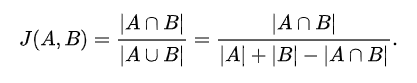

합집합에서 교집합의 비율을 구함
  - 0 : 서로 독립적인 경우
  - 1 : 서로 완전히 같은 경우

In [146]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

In [147]:
# 토큰화

tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

In [149]:
print(tokenized_doc1)
print(tokenized_doc2)

['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [150]:
# 합집합 계산

union = set(tokenized_doc1).union(set(tokenized_doc2)) # set: 중복 허용 않고, 순서 상관 없이 데이터 저장
print(union)

{'banana', 'passport', 'likey', 'love', 'apple', 'like', 'watch', 'you', 'holder', 'card', 'everyone', 'coupon'}


In [152]:
# 교집합 계산

intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print(intersection)

{'banana', 'apple'}


In [153]:
# 자카드 유사도 계산

print(len(intersection)/len(union))

0.16666666666666666
